<a href="https://colab.research.google.com/github/Alireza-Bayat/CS-SBU-eDataMining-MSc-2022/blob/400422048/submits/400422048/project1/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# imports and connecting to the google drive

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
! ls '/gdrive/MyDrive/dataSet/dataMiningProjects'
root = '/gdrive/MyDrive/dataSet/dataMiningProjects/'

Mounted at /gdrive
AB_NYC_2019.csv  immo_data.csv


# read dataset and convert data types

In [153]:
airbnb = pd.read_csv(root+"AB_NYC_2019.csv",dtype={'neighbourhood_group':'category','room_type':'category','neighbourhood':'category'})
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   name                            48879 non-null  object  
 2   host_id                         48895 non-null  int64   
 3   host_name                       48874 non-null  object  
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  object  
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  object  
 9   price                           48895 non-null  int64   
 10  minimum_nights                  48895 non-null  int64   
 11  number_of_reviews               48895 non-null  int64   
 12  last_review       

# data cleaning

## removing column with more than 50% null data

In [ ]:
airbnb.columns[((airbnb.isna().sum()/len(airbnb)) > 0.50)]

Index([], dtype='object')

* there is no column in this sample dataset that violate the 50% null values.

In [ ]:
airbnb.host_id.isna().sum()

0

## removing un-usefull columns

In [80]:
airbnb.drop(columns=(['id','availability_365']),inplace=True)
airbnb

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6


## filling numeric NaN data by mean of that column

In [76]:
airbnb.fillna(airbnb._get_numeric_data().mean(),inplace = True)
airbnb

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,1.373221,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,1.373221,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1.373221,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,1.373221,6,2


## ommiting outlier data according to each neighbour

* in each neighbourhood will remove outlier rows

In [97]:
airbnb.neighbourhood_group.unique()

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [107]:
airbnb.shape

(48895, 14)

In [141]:

for nei in airbnb.neighbourhood_group.unique():
  _mask  = (airbnb['neighbourhood_group']== nei)
  upper_range = airbnb[_mask]['price'].mean() + 3 * airbnb[_mask]['price'].std()
  lower_range = airbnb[_mask]['price'].mean() - 3 * airbnb[_mask]['price'].std()
  # print('upper bound',upper_range)
  # print('lower bound',lower_range)
  indexs = airbnb[_mask][(airbnb[_mask]['price'] > upper_range) | (airbnb[_mask]['price'] < lower_range)].index
  # print(indexs)
  airbnb = airbnb.drop(indexs)
 

In [129]:
airbnb.shape


(48552, 14)

# advertisments in each neighbourhood info

In [130]:
neighbourGroup = airbnb.groupby('neighbourhood_group').agg({'price':['sum','mean','count']})
neighbourGroup

price                   
                         sum        mean  count
neighbourhood_group                            
Bronx                  85359   79.256267   1077
Brooklyn             2292565  114.817699  19967
Manhattan            3850394  179.138085  21494
Queens                527454   93.453933   5644
Staten Island          35575   96.148649    370

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


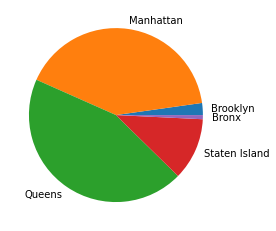

In [31]:
mylabels = airbnb.neighbourhood_group.unique();
plt.pie(airbnb.groupby('neighbourhood_group').agg({'price':['count']}),labels=mylabels)
plt.show()

* price summation according to each neighbourhood

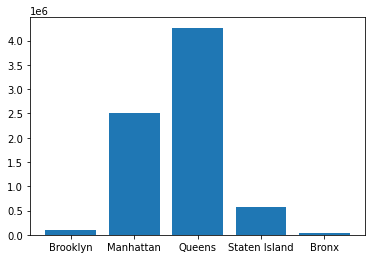

In [70]:
plt.bar(mylabels,airbnb.groupby('neighbourhood_group').agg({'price':['sum']}).squeeze().values)
plt.show()

* price mean according to each neighbourhood

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


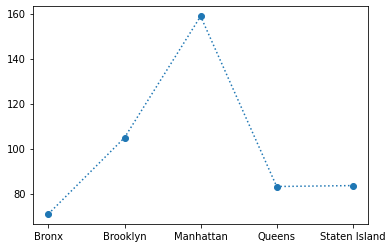

In [147]:
plt.plot(airbnb.groupby('neighbourhood_group').agg({'price':['mean']}),linestyle = 'dotted',marker = 'o')
plt.show()

# advertisment count of each host

* counting each rows price will represent final count of adds for each host

In [140]:
airbnbPivot = airbnb.pivot_table(index=['host_id','host_name'],values='price',aggfunc=["count"],)
# airbnb.groupby(['host_id','host_name']).agg({'price':['count']})
airbnbPivot

,,count
,,price
host_id,host_name,
2438,Tasos,1
2571,Teedo,1
2787,John,6
2845,Jennifer,2
2868,Letha M.,1
...,...,...
274273284,Anastasia,1
274298453,Adrien,1


# most viewed rooms 

In [151]:
topReviewsRooms = airbnb.sort_values(['number_of_reviews'],ascending=False).head(100)
topReviewsRooms

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
11759,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2
2031,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3
2030,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3
2015,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3
13495,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,Charming Bedroom in Harlem,27944388,Charles,Manhattan,East Harlem,40.80226,-73.94506,Private room,70,1,325,2019-06-19,6.19,1
2111,"Private Room & Coffee, only 3 blocks to Train",5239845,Deanna,Brooklyn,Bushwick,40.69288,-73.90374,Private room,62,2,324,2019-06-28,4.30,1
2259,"Big 1st Meal, Kind Host, Ace Space",5909206,Nancy,Manhattan,East Harlem,40.79794,-73.93223,Private room,58,1,323,2019-07-01,4.30,1
6042,"Great location, cozy, near F, G, R!",3641595,Deirdre,Brooklyn,Park Slope,40.67099,-73.98791,Entire home/apt,160,1,323,2019-06-22,5.81,1


* as it is shown in the table most visited rooms where place in `Brooklyn`,`Manhattan` and `Queens` geographically speeking.

In [152]:
topReviewsRooms.groupby('neighbourhood_group').agg({'price':['count']})

,price
,count
neighbourhood_group,
Bronx,0
Brooklyn,35
Manhattan,32
Queens,32
Staten Island,1


* average price for room is about `88.71` in total and in table we can see average in each area.

In [157]:
topReviewsRooms.price.mean()

88.71

In [166]:
topReviewsRooms.groupby('neighbourhood_group').agg({'price':['mean']})

,price
,mean
neighbourhood_group,
Bronx,NaN
Brooklyn,111.885714
Manhattan,97.937500
Queens,55.781250
Staten Island,36.000000


* and according to room type most views are for private rooms 

In [161]:
topReviewsRooms.groupby('room_type').agg({'price':['count']})

,price
,count
room_type,
Entire home/apt,24
Private room,75
Shared room,1


#  Hypothesis Test

## area effect on price
  * sample on Manhattan 

In [176]:
mask  = (airbnb['neighbourhood_group']== 'Manhattan')
tstat,p_value = stats.ttest_1samp(airbnb[mask].price,airbnb['price'].mean())

if p_value<= 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


## room type effect on price
  * Private room are tested for sample case

In [178]:
mask  = (airbnb['room_type']== 'Private room')
tstat,p_value = stats.ttest_ind(airbnb[mask].price,airbnb['price'].mean())

if p_value<= 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## relation between neighbourhood and room_type 

In [183]:
contingency_table=pd.crosstab(airbnb["neighbourhood_group"],airbnb["room_type"])
print('contingency_table : \n',contingency_table)
print('________________________________________________')
chi2_stat , p_value , dof , expected = stats.chi2_contingency(contingency_table.values)

alpha = 0.05
if p_value<=alpha:
    print("There is a relation between neighbourhood and room_type")
else:
    print("There is no relation between neighbourhood and room_type")

contingency_table : 
 room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9
________________________________________________
There is a relation between neighbourhood and room_type


# Price prediction 